In [ ]:
%pip install Pillow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

import os
import pandas as pd
import numpy as np



In [3]:
from tqdm import tqdm

In [4]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label, imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels
            

In [6]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgusted completed
fearful completed
happy completed
neutral completed
sad completed
surprised completed


In [7]:
print (train)

                                  image      label
0            images/train\angry\im0.png      angry
1            images/train\angry\im1.png      angry
2           images/train\angry\im10.png      angry
3          images/train\angry\im100.png      angry
4         images/train\angry\im1000.png      angry
...                                 ...        ...
28704  images/train\surprised\im995.png  surprised
28705  images/train\surprised\im996.png  surprised
28706  images/train\surprised\im997.png  surprised
28707  images/train\surprised\im998.png  surprised
28708  images/train\surprised\im999.png  surprised

[28709 rows x 2 columns]


In [8]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgusted completed
fearful completed
happy completed
neutral completed
sad completed
surprised completed


In [9]:
print(test)
print(test['image'])

                               image      label
0          images/test\angry\im0.png      angry
1          images/test\angry\im1.png      angry
2         images/test\angry\im10.png      angry
3        images/test\angry\im100.png      angry
4        images/test\angry\im101.png      angry
...                              ...        ...
7173  images/test\surprised\im95.png  surprised
7174  images/test\surprised\im96.png  surprised
7175  images/test\surprised\im97.png  surprised
7176  images/test\surprised\im98.png  surprised
7177  images/test\surprised\im99.png  surprised

[7178 rows x 2 columns]
0            images/test\angry\im0.png
1            images/test\angry\im1.png
2           images/test\angry\im10.png
3          images/test\angry\im100.png
4          images/test\angry\im101.png
                     ...              
7173    images/test\surprised\im95.png
7174    images/test\surprised\im96.png
7175    images/test\surprised\im97.png
7176    images/test\surprised\im98.png
7177    i

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [11]:
train_features = extract_features(train['image'])

100%|███████████████████████████████████████████████████████████████████| 28709/28709 [04:30<00:00, 105.96it/s]


In [12]:
test_features = extract_features(test['image'])

100%|██████████████████████████████████████████████████████████████████████| 7178/7178 [01:52<00:00, 63.61it/s]


In [13]:
x_train = train_features/255.0
x_test = test_features/255.0


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train =  to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [18]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D output to 1D
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting

# Output layer - change '7' to number of classes in your problem
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




C:\Users\shubh\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.fit(x= x_train , y = y_train , batch_size = 128 , epochs = 100, validation_data =(x_test, y_test))

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 33s 132ms/step - accuracy: 0.2447 - loss: 1.8290 - val_accuracy: 0.3222 - val_loss: 1.6746
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 29s 129ms/step - accuracy: 0.3343 - loss: 1.6637 - val_accuracy: 0.4238 - val_loss: 1.4954
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 29s 131ms/step - accuracy: 0.4183 - loss: 1.5002 - val_accuracy: 0.4486 - val_loss: 1.4069
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5106s 23s/step - accuracy: 0.4613 - loss: 1.4061 - val_accuracy: 0.4980 - val_loss: 1.3235
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 29s 131ms/step - accuracy: 0.4883 - loss: 1.3422 - val_accuracy: 0.5120 - val_loss: 1.2832
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 133ms/step - accuracy: 0.5124 - loss: 1.2929 - val_accuracy: 0.5201 - val_loss: 1.2599
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 29s 129ms/step - accuracy: 0.5186 - loss: 1.2624 - val_accuracy: 0.5373 - val_loss: 1.2135
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.5434 -

In [39]:
model_json = model.to_json()
with open ("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiomdetection.h5")    

In [40]:
label = ['angry','disgust','fear','happy''netural','sad','surprise']

In [41]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

def ef(image):
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))  # correct keyword here
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)
    feature = feature / 255.0  # normalize if needed
    return feature

In [42]:


image = r'C:\\Users\\shubh\\OneDrive\\Desktop\\123467\\images\\train\\angry\\im0.png'
print("Original image is of angry")

img = ef(image)                 # Preprocess image
pred = model.predict(img)       # Make prediction
pred_label = label[pred.argmax()]  # Map prediction to label
print("Model prediction is", pred_label)


Original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Model prediction is angry


In [ ]:
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.0 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 4.6 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.1 MB 4.3 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 4.2 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 4.1 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.1 MB 4.1 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 4.1 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------- -----------

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline 

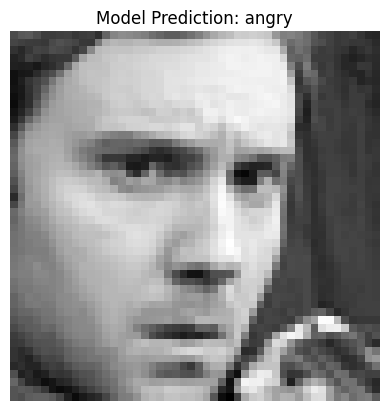

In [44]:
img_display = load_img(image, color_mode='grayscale', target_size=(48, 48))
plt.imshow(img_display, cmap='gray')
plt.title(f"Model Prediction: {pred_label}")
plt.axis('off')
plt.show()




In [46]:
image = r'C:\\Users\\shubh\\OneDrive\\Desktop\\123467\\images\\train\\fearful\\im0.png'
print("Original image is of fear")

img = ef(image)                 # Preprocess image
pred = model.predict(img)       # Make prediction
pred_label = label[pred.argmax()]  # Map prediction to label
print("Model prediction is", pred_label)

Original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Model prediction is fear


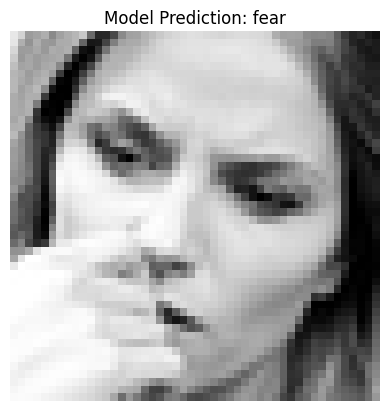

In [47]:
img_display = load_img(image, color_mode='grayscale', target_size=(48, 48))
plt.imshow(img_display, cmap='gray')
plt.title(f"Model Prediction: {pred_label}")
plt.axis('off')
plt.show()


In [49]:
image = r'C:\\Users\\shubh\\OneDrive\\Desktop\\123467\\images\\train\\disgusted\\im0.png'
print("Original image is of disgust")

img = ef(image)                 # Preprocess image
pred = model.predict(img)       # Make prediction
pred_label = label[pred.argmax()]  # Map prediction to label
print("Model prediction is", pred_label)

Original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Model prediction is disgust


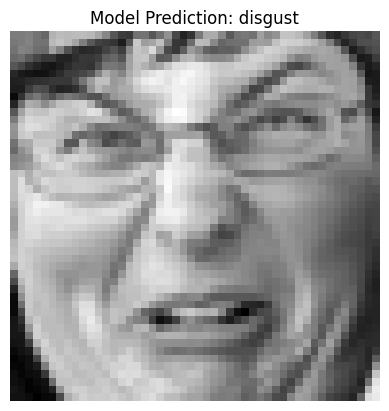

In [50]:
img_display = load_img(image, color_mode='grayscale', target_size=(48, 48))
plt.imshow(img_display, cmap='gray')
plt.title(f"Model Prediction: {pred_label}")
plt.axis('off')
plt.show()